# Algorithmic Toolbox Week #3

## Money Change

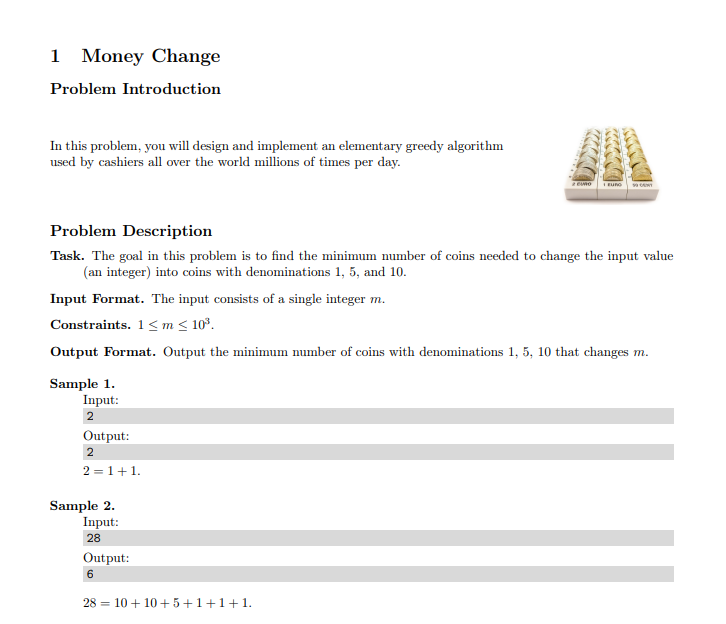

In [ ]:
def getChange(m,values=[10,5,1]):
  #assume that our coin system is greedy( all s divide each other)
  coins=0
  values=sorted(values,reverse=True)
  for c in values:
    coins += m // c
    m = m % c
  return coins
getChange(14)

5

In [ ]:
from itertools import product
def naiveGetChange(m,values=[10,5,1]):
  #tester works for not only greedy problems
  posibleWeights = [range(m//v + 1) for v in values]
  myMin = (m,m)
  i = 0
  for w in product(*posibleWeights):
    weightedSum = sum([values[j]*w[j] for j in range(len(w))])
    if(weightedSum == m):
      myMin= min(myMin,(sum(w),i))
    i+= 1
  return myMin[0]

In [ ]:
for i in range(100):
  assert naiveGetChange(i)==getChange(i)

## Maximum Value of Loot

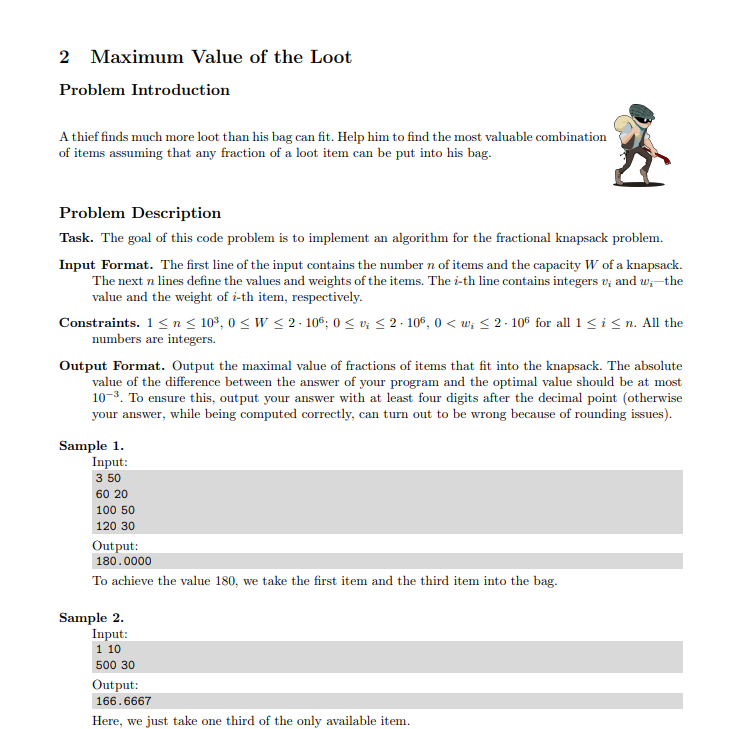

In [ ]:
def get_optimal_value(capacity, weights, values):
    value = 0.
    tuplePairs = (zip(weights,values))
    # print(myDict)
    tuplePairs = sorted(tuplePairs,key=lambda x: x[1]/x[0],reverse=True)
    # print (tuplePairs)
    for obj in tuplePairs:
      # print(value)
      if (obj[0]<capacity):
        value += obj[1]
        capacity -= obj[0]
      else: 
        value +=obj[1]*(capacity)/obj[0]
        return value
    
    return value
get_optimal_value(50,*list(zip((60 ,20),
(100 ,50),
(120 ,30)))[::-1])


180.0

In [ ]:
%%writefile knapsack2.py
# Uses python3
import sys

def get_optimal_value(capacity, weights, values):
    value = 0.
    tuplePairs = (zip(weights,values))
    # print(myDict)
    tuplePairs = sorted(tuplePairs,key=lambda x: x[1]/x[0],reverse=True)
    # print (tuplePairs)
    for obj in tuplePairs:
      # print(value)
      if (obj[0]<capacity):
        value += obj[1]
        capacity -= obj[0]
      else: 
        value +=obj[1]*(capacity)/obj[0]
        return value
    
    return value
if __name__ == "__main__":
    data = list(map(int, sys.stdin.read().split()))
    n, capacity = data[0:2]
    values = data[2:(2 * n + 2):2]
    weights = data[3:(2 * n + 2):2]
    opt_value = get_optimal_value(capacity, weights, values)
    print("{:.10f}".format(opt_value))



Overwriting knapsack2.py


In [ ]:
! python knapsack2.py < inputknap.txt

/bin/bash: inputknap.txt: No such file or directory


In [ ]:
%%writefile inputknap.txt

3 50
60 20
120 30
100 50

Writing inputknap.txt


## Car Fueling

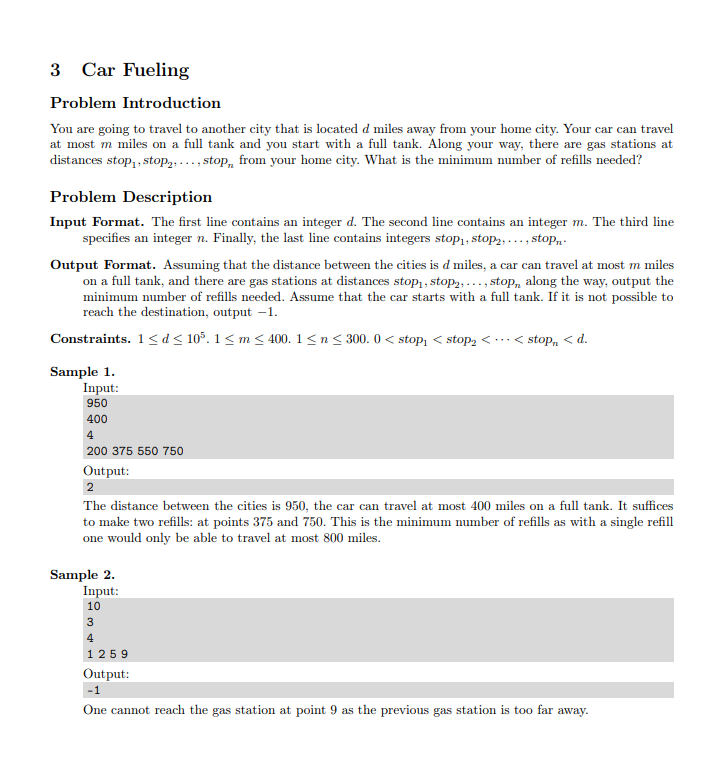

In [ ]:
# python3
import sys


def compute_min_refills(distance, tank, stops):
    # write your code here
    steps = 0
    last = 0
    if(tank<stops[0]): 
      print("asdfasd")
      return -1
    for i in range(len(stops)):
      
      if(tank>=stops[i]-last): continue
      else:
        steps +=1
        last = stops[i-1]
    
    print(tank)
    print(distance)
    print(last)
    if(tank>=distance-last): return steps
    if(tank>=distance-stops[-1] and tank>=stops[-1]-last): return steps+1
    return -1


compute_min_refills(950,
400,
[200,375,550,750]
)

400
950
375


2

In [ ]:
%%writefile distancias.py
import sys


def compute_min_refills(distance, tank, stops):
    # write your code here
    steps = 0
    last = 0
    if(tank<stops[0]):
      return -1
    for i in range(len(stops)):
      
      if(tank>=stops[i]-last): continue
      elif(tank>=stops[i-1]-last):
        steps +=1
        last = stops[i-1]
      else: return -1    
    if(tank>=distance-last): return steps
    if(tank>=distance-stops[-1] and tank>=stops[-1]-last): return steps+1
    return -1
if __name__ == '__main__':
    d, m, _, *stops = map(int, sys.stdin.read().split())
    print(compute_min_refills(d, m, stops))

Overwriting distancias.py


In [ ]:
%%writefile casosDistancias.txt
2200
400
200
375
550
750
1150
1700
2000

Overwriting casosDistancias.txt


In [ ]:
!python distancias.py < casosDistancias.txt

-1


## Max Revenue

In [ ]:
%%writefile ex_4.py

import sys

def max_dot_product(a, b):
    # Max values are in the same position
    # for each sequence
    a = sorted(a, reverse=True)
    b = sorted(b, reverse=True)

    # Calculates dot product
    res = 0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    a = data[1:(n + 1)]
    b = data[(n + 1):]
    print(max_dot_product(a, b))    

Writing ex_4.py


In [ ]:
%%writefile test_case_ex_4.txt
3
1 3 -5
-2 4 1

Writing test_case_ex_4.txt


In [ ]:
! python ex_4.py < test_case_ex_4.txt

23


## Collecting Signatures

In [ ]:
%%writefile ex_5.py
from ctypes import pointer
import sys
from collections import namedtuple

Segment = namedtuple('Segment', 'start end')

def optimal_points(segments):
    points = []
    segments = sorted(segments, key=lambda x: x.end)
 
    cover_point = -1
    for s in segments:
        if(s.start > cover_point):
            cover_point = s.end
            points.append(cover_point)
            
    return points
    

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *data = map(int, input.split())
    segments = list(map(lambda x: Segment(x[0], x[1]), zip(data[::2], data[1::2])))        
    points = optimal_points(segments)

    print(len(points))    
    print(*points)    


Overwriting ex_5.py


In [ ]:
%%writefile test_case_ex_5.txt
4
4 7
1 3
2 5
5 6

Overwriting test_case_ex_5.txt


In [ ]:
! python ex_5.py < test_case_ex_5.txt

2
3 6


## Maximum Number of Prizes

In [ ]:
%%writefile ex_6.py
import sys

def optimal_summands(n):
    summands = []
    s = 1    
    while (n - s) > s:
        summands.append(s)
        n -= s
        s += 1
    summands.append(n)

    return summands

if __name__ == '__main__':
    input = sys.stdin.read()
    n = int(input)
    summands = optimal_summands(n)
    print(len(summands))
    for x in summands:
        print(x, end=' ')


Overwriting ex_6.py


**Test**

In [ ]:
! echo 8 | python ex_6.py 

3
1 2 5 

## Maximum Salary

In [ ]:
%%writefile ex_7.py
import sys

BASE_POWER = 9

def get_best(a_str, b_str):
    score_a = 0
    score_b = 0

    for i, (c_a, c_b) in enumerate(zip(a_str, b_str)):
        if int(c_a) > int(c_b):
            score_a += 10*(BASE_POWER - i) + int(c_a) - int(c_b)
        elif int(c_a) == int(c_b):
            if(len(a_str) < len(b_str)):
                score_a += 10*(BASE_POWER - i) + int(c_a) - int(c_b)
            else:
                score_b += 10*(BASE_POWER - i) + int(c_b) - int(c_a)
        else:
            score_b += 10*(BASE_POWER - i) + int(c_b) - int(c_a)
    
    if score_a > score_b:
        best_number = a_str
    else:
        best_number = b_str
    
    return best_number


def largest_number(a):
    largest = ""    
    max_numbers = []    
    while len(a) > 0:
        max_tmp = "0"
        for current_number in a:
            max_tmp = get_best(current_number, max_tmp)                

        max_numbers.append(max_tmp)

        a.remove(max_tmp)

    for n in max_numbers:
        largest += n        

    return largest

if __name__ == '__main__':
    input = sys.stdin.read()
    data = input.split()
    a = data[1:]    
    print(largest_number(a))

Writing ex_7.py


In [ ]:
%%writefile ex_7b.py
import sys

BASE_POWER = 9

def isGreaterComp(a,b):
  diffOfLens = len(a)-len(b)
  if(diffOfLens==0): return int(a)>int(b)
  elif(diffOfLens<0): return int(a+(a[0]*abs(diffOfLens)))>int(b)
  else: return int(b+(b[0]*abs(diffOfLens)))<int(a)

def largest_number2(a):
    largest = ""    
    max_numbers = []    
    while len(a) > 0:
        max_tmp = "0"
        for current_number in a:
          if isGreaterComp(current_number,max_tmp):max_tmp=current_number         
        max_numbers.append(max_tmp)

        a.remove(max_tmp)

    for n in max_numbers:
        largest += n        

    return largest

if __name__ == '__main__':
    input = sys.stdin.read()
    data = input.split()
    a = data[1:]    
    print(largest_number2(a))

Overwriting ex_7b.py


In [ ]:
def isGreaterComp(a,b):
  diffOfLens = len(a)-len(b)
  if(diffOfLens==0): return int(a)>int(b)
  elif(diffOfLens<0): return int(a+(a[0]*abs(diffOfLens)))>int(b)
  else: return int(b+(b[0]*abs(diffOfLens)))<int(a)
isGreaterComp("2","21")

True

In [ ]:
%%writefile test_case_ex_7.txt
5
94619

Writing test_case_ex_7.txt


In [ ]:
! python ex_7b.py < test_case_ex_7.txt

94619


## **Screenshots Coursera**

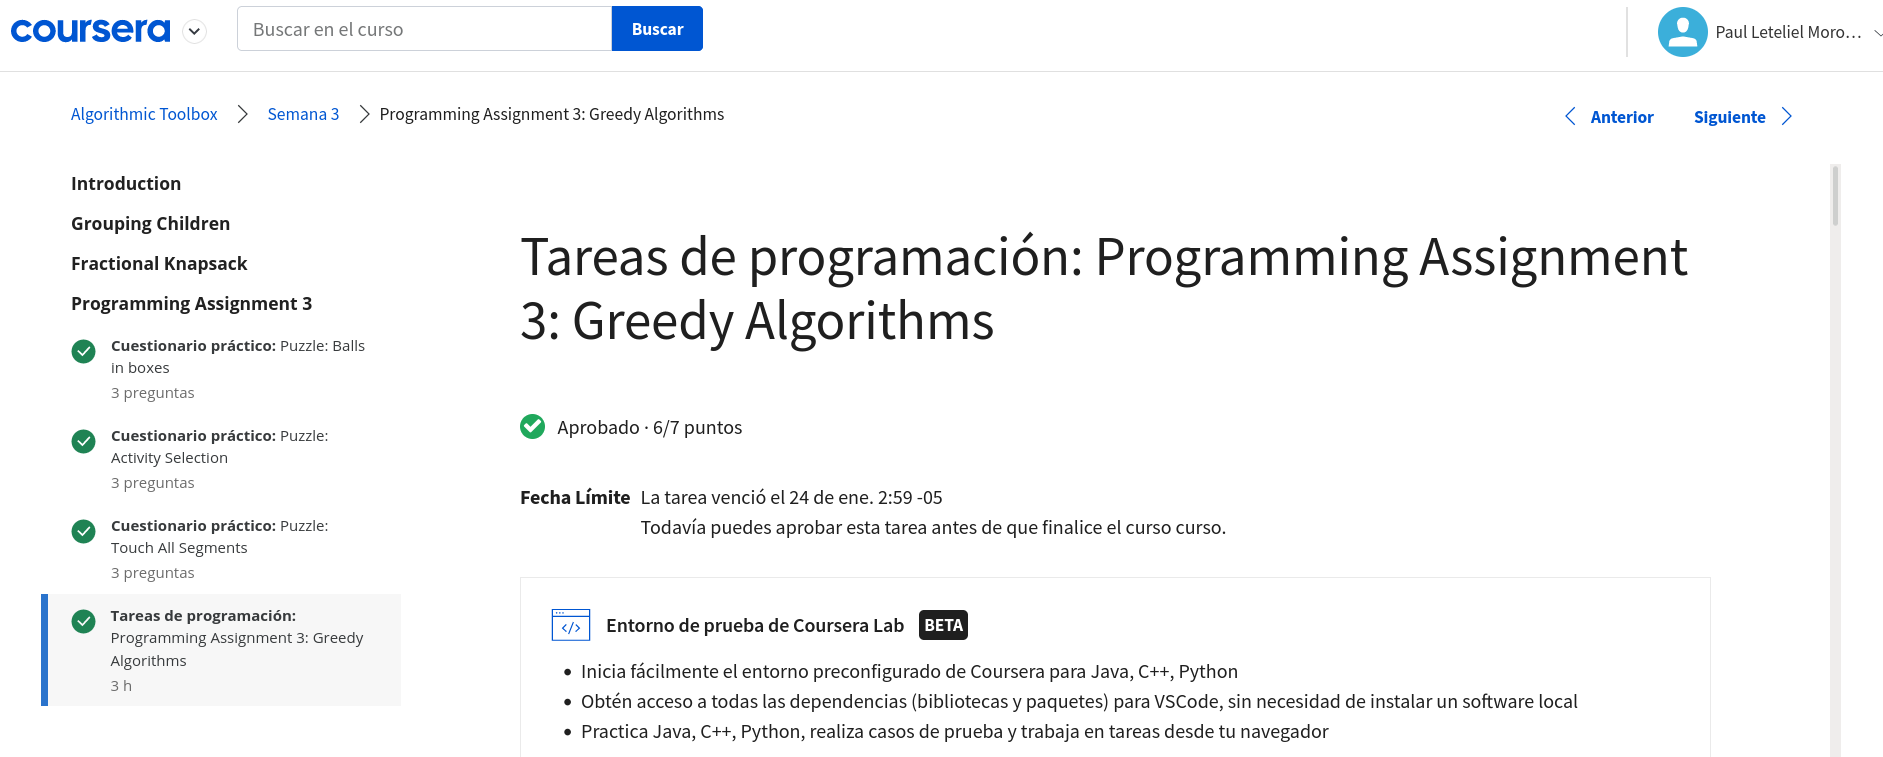

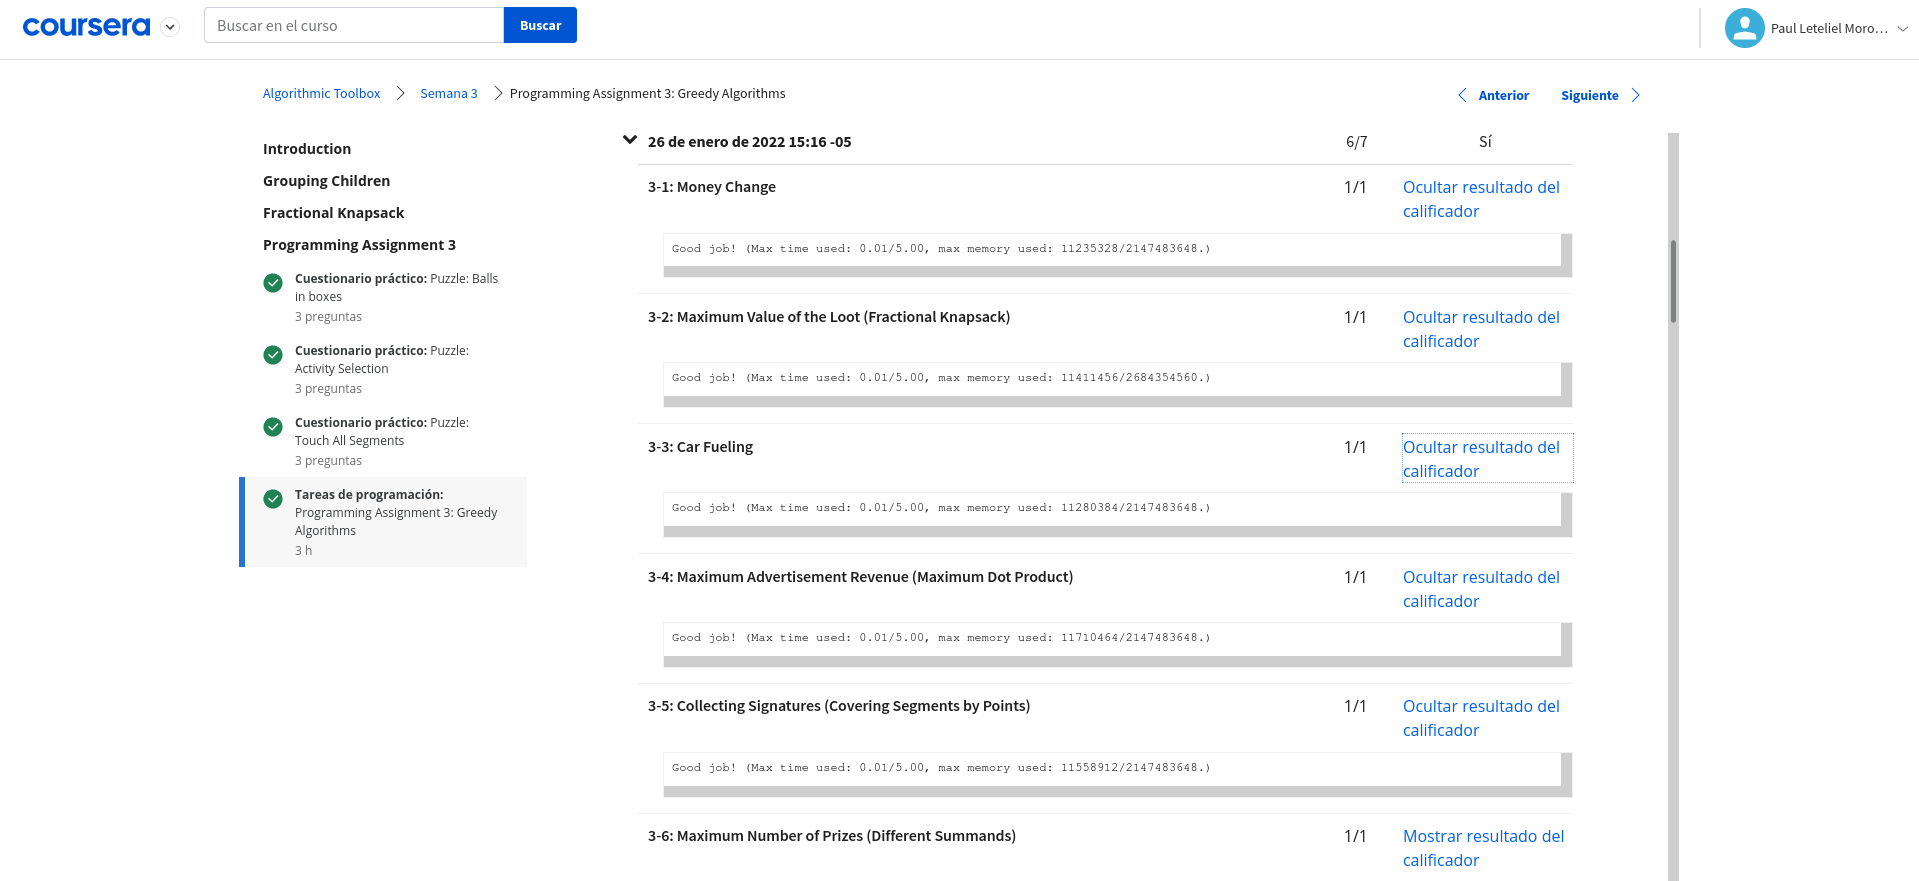

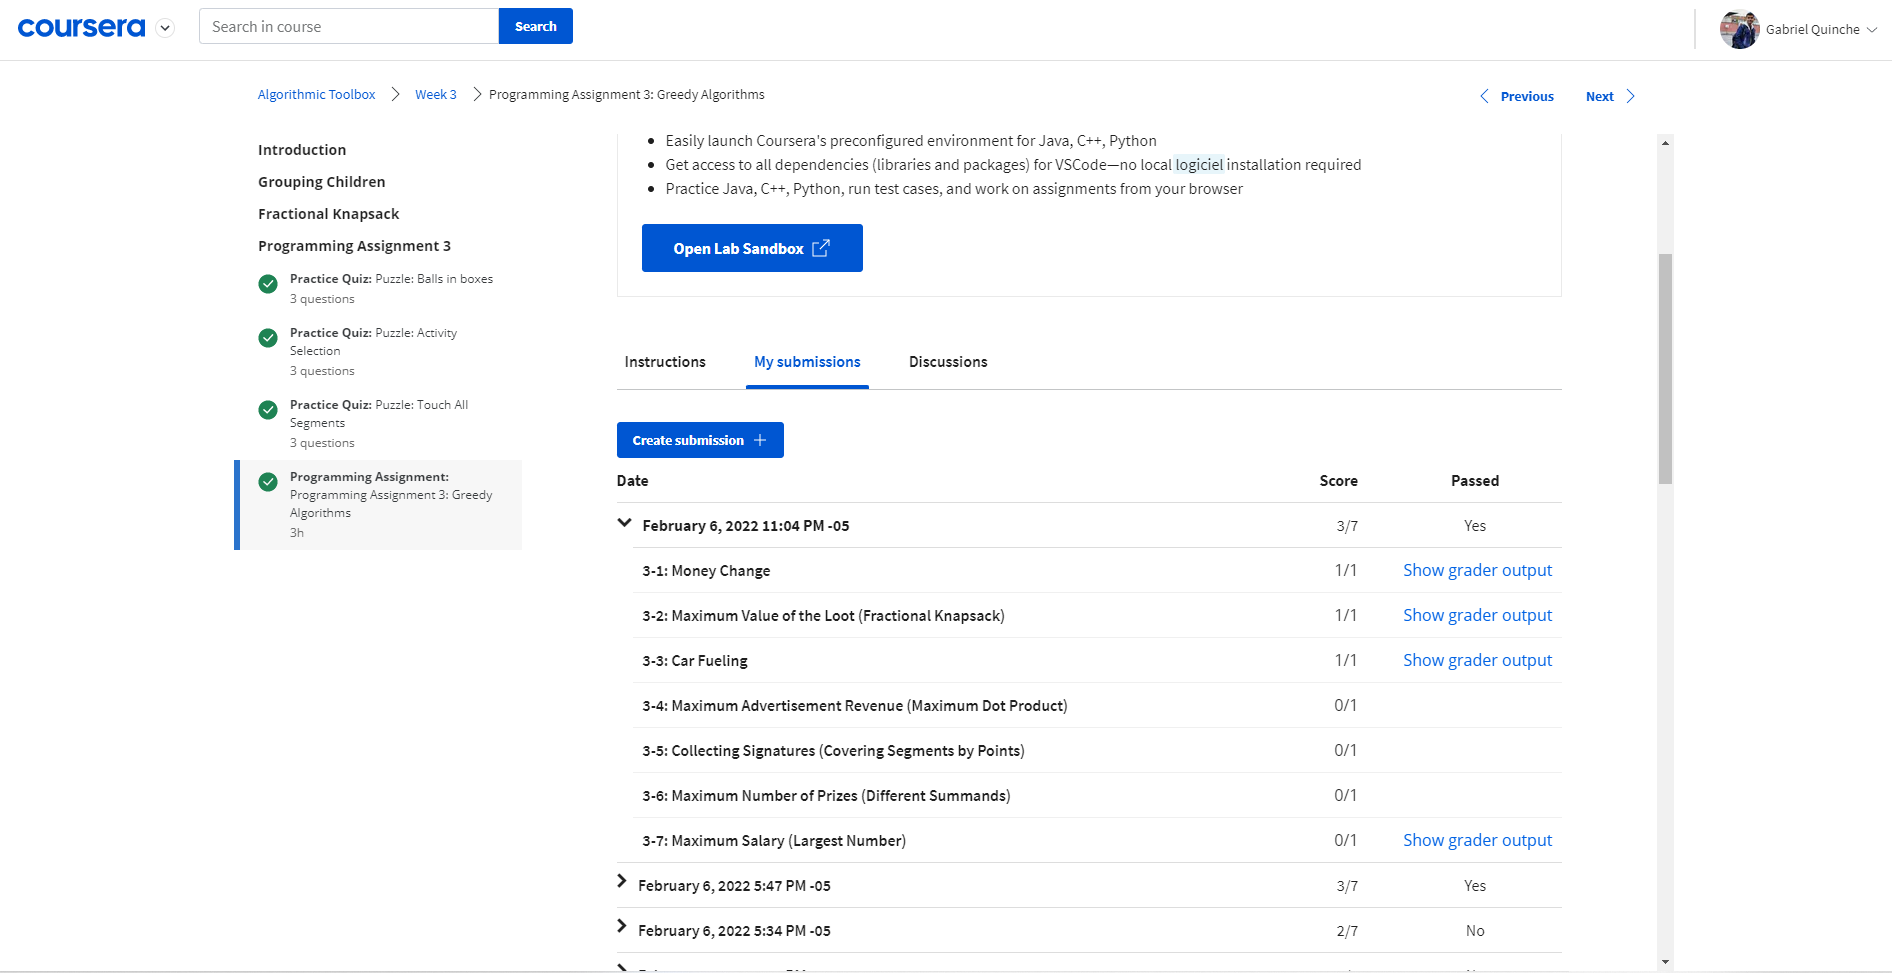

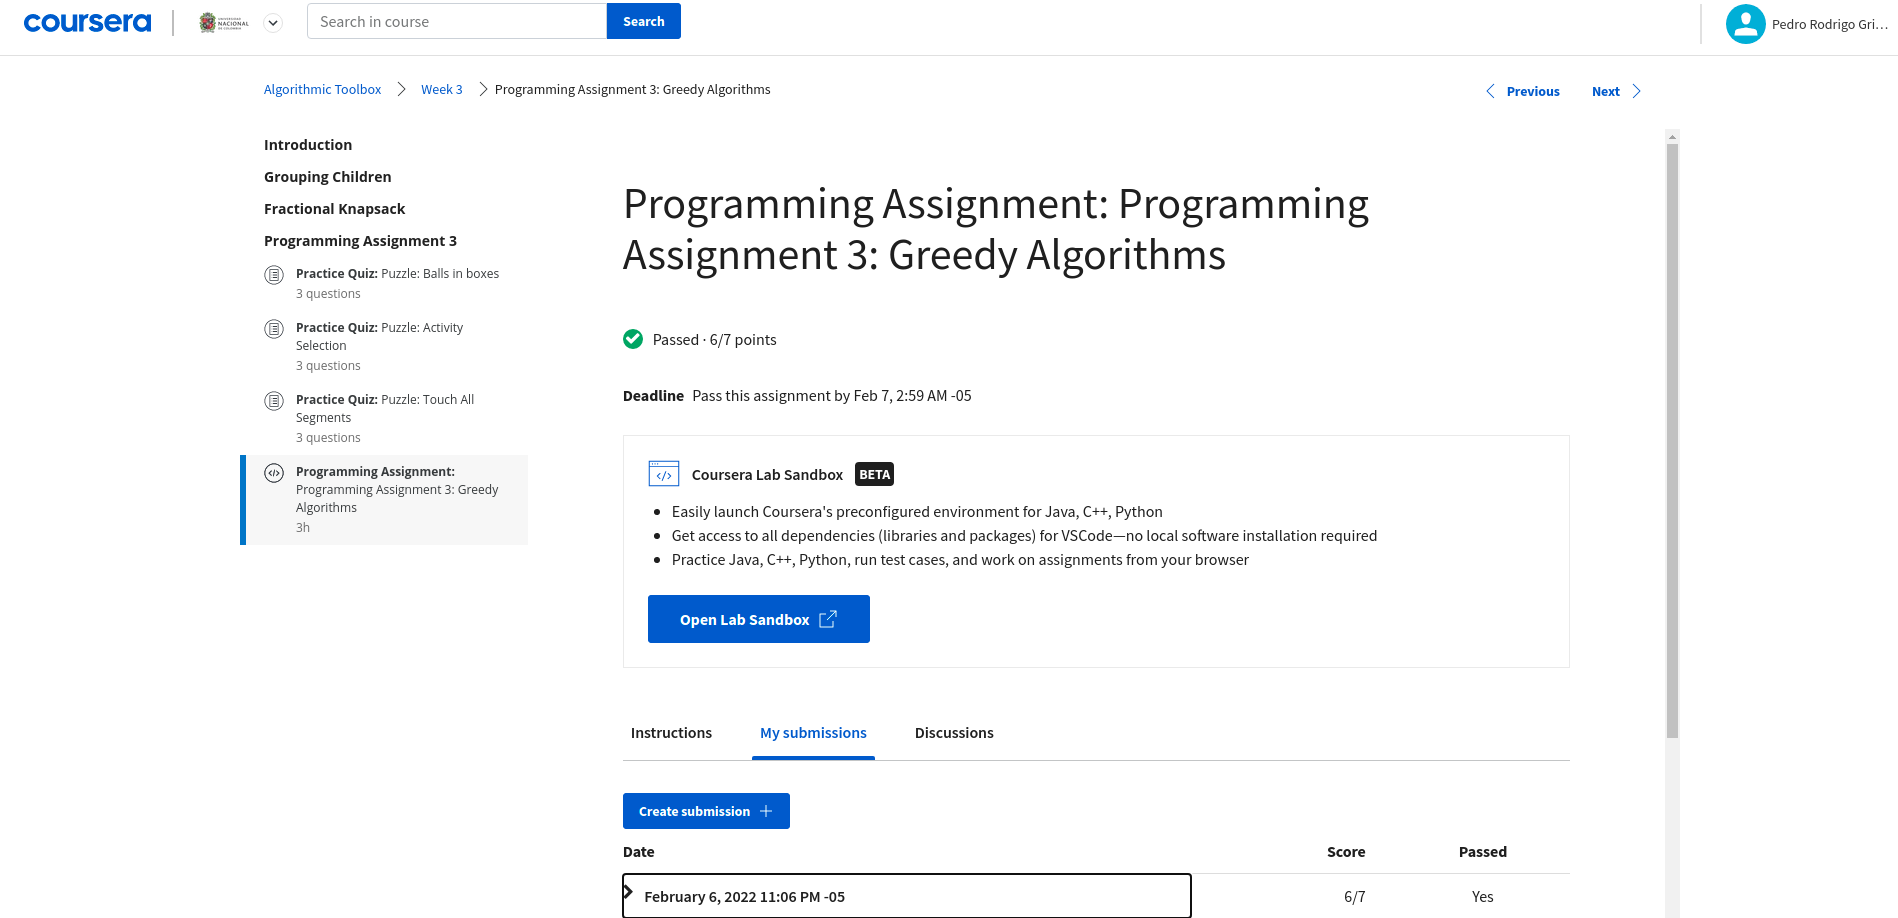